## Clean Technologies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
categories = pd.read_excel('../data/categories.xlsx')
categories = categories.fillna(method='ffill')
categories.columns = ['sector','group','technology','description','terms','source']
categories.head()

,sector,group,technology,description,terms,source
0,Energy,Solar energy sources,solar PV,Also “solar photovoltaic”; technology of using...,"photovoltaic, PV, “solar cell”",https://www.ctc-n.org/technologies/solar-pv
1,Energy,Solar energy sources,concentrated solar power (CSP),Technology of producing electricity by concent...,"“concentrated solar power”, CSP, “concentrated...",https://setis.ec.europa.eu/technologies/concen...
2,Energy,Solar energy sources,solar heating,Technology of capturing the sun's radiation an...,“solar heating”,https://www.ctc-n.org/technologies/solar-heating
3,Energy,Solar energy sources,solar dryer,"Technology of drying substances, especially fo...",“solar dryer”,https://www.ctc-n.org/technologies/solar-dryer
4,Energy,Solar energy sources,solar water pump,Technology of powering electrical water pumps ...,“solar water pump”,https://www.ctc-n.org/technologies/solar-water...


In [3]:
matrix = []
for term in categories['terms']:
    row = [x.strip() for x in term.split(',')]
    row = [i.replace('“', '').replace('”', '') for i in row]
    matrix.append(row)
categories['terms'] = matrix

In [4]:
terms = [y for x in categories['terms'] for y in x if y != '']

---

In [5]:
cordish2020 = pd.read_excel('../data/cordis-h2020projects.xlsx')

In [6]:
cordish2020['startDate'] = cordish2020['startDate'].map(pd.Timestamp)
cordish2020['endDate'] = cordish2020['endDate'].map(pd.Timestamp)

In [7]:
cordish2020.head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects
0,196618,643555,UNCAP,CLOSED,H2020-EU.3.1.6.,PHC-20-2014,H2020,Ubiquitous iNteroperable Care for Ageing People,2015-01-01,2017-12-31,...,The lack of ICT platforms based on open standa...,3820763.91,3086254.00,H2020-PHC-2014-single-stage,/IA,TRILOGIS SRL,IT,CREATE-NET (CENTER FOR RESEARCH AND TELECOMMUN...,IT;RO;DE;SE;EL;ES;MK;UK;SI,NaN
1,220199,822166,Governance,SIGNED,H2020-EU.3.6.3.;H2020-EU.3.6.1.,GOVERNANCE-14-2018,H2020,Democratic governance in a turbulent age,2018-12-01,2023-11-30,...,Democratic politics and governance in Europe a...,9090927.00,3000000.00,H2020-SC6-GOVERNANCE-2018,/ERA-NET-Cofund,NEDERLANDSE ORGANISATIE VOOR WETENSCHAPPELIJK ...,NL,STYRELSEN FOR FORSKNING OG UDDANNELSE;FONDS ZU...,DK;AT;EE;IS;LT;DE;SE;SI;CZ;ES;FI;PL;UK;NO;CH;I...,NaN
2,220196,822189,BRaVE,SIGNED,H2020-EU.3.6.1.2.,SU-GOVERNANCE-11-2018,H2020,Building Resilience Against Violent Extremism ...,2019-01-01,2021-06-30,...,Far Right and Islamist groups seeking to recru...,1483750.00,1483750.00,H2020-SC6-GOVERNANCE-2018,/CSA,EUROPEAN UNIVERSITY INSTITUTE,IT,DUBLIN CITY UNIVERSITY;KOZEP-EUROPAI EGYETEM;C...,IE;HU;BE;UK;PL;DE,NaN
3,216332,801338,VES4US,SIGNED,H2020-EU.1.2.1.,FETOPEN-01-2016-2017,H2020,Extracellular vesicles from a natural source f...,2018-09-01,2021-08-31,...,"Extracellular vesicles (EVs) are cell-derived,...",2946303.75,2946303.75,H2020-FETOPEN-1-2016-2017,/RIA,CONSIGLIO NAZIONALE DELLE RICERCHE,IT,"ZABALA INNOVATION CONSULTING, S.A.;INSTITUTE O...",ES;IE;CH;DE;SI,NaN
4,216023,770045,DIALLS,SIGNED,H2020-EU.3.6.3.2.,CULT-COOP-03-2017,H2020,DIalogue and Argumentation for cultural Litera...,2018-05-01,2021-04-30,...,DIALLS is a three year project with three obje...,4373308.75,4373308.75,H2020-SC6-CULT-COOP-2017-two-stage,/RIA,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,UK,EDEX - EDUCATIONAL EXCELLENCE CORPORATION LIMI...,CY;FI;PT;LT;ES;IL;DE;FR,NaN


Objective example

---

In [8]:
cordish2020.loc[13]['objective']

'Slag is a by-product of metal smelting, and ~3.5 million tpa are produced globally in refining Non Ferrous Metals (NFM) and making alloys. Slag contains impurities and forms a protective crust of non-metallic & metallic oxides, and contains significant ‘free’ & alloyed metal (from 10 to 70% by weight). While slag can be used as aggregate, there are increasing concerns over ‘leaching’ of heavy metals into water courses from using these materials in civil engineering. While some metal can be recovered by re-melting slag (at very high temp), this is extremely expensive with very high energy burden which often makes recovery un-economic, but necessary. Landfill of slag is increasingly not an option. Our idea is to use a relatively new technology called ‘implosion’ to selectively break down and separate non-metallic components of slag from metallic particles. This will be combined with ultrasonic vibration sieving for accelerated recovery of metal from the finest fraction. This novel techn

---

#### Flashtext for easy regex

In [9]:
from flashtext import KeywordProcessor

In [10]:
def extract(vec, dictionary, info=False):
    empty = []
    for line in vec:
        empty.append(dictionary.extract_keywords(line, span_info=info))
    return empty

In [11]:
categories_short = categories[['group','technology']] #'sector',
for column in categories_short.columns:
    dictionary = KeywordProcessor()
    dictionary.add_keywords_from_list(list(categories_short[str(column)]))
    extracted = extract(cordish2020['objective'], dictionary)
    #cordish2020['matches_'+str(column)] = extracted
    cordish2020['matches_'+str(column)] = [list(set(i)) if len(i)>0 else '' for i in extracted]
    cordish2020['count_matches_'+str(column)] = [len(i) for i in extracted]
    cordish2020['count_unique_matches_'+str(column)] = [len(set(i)) for i in extracted]

In [12]:
#adding the new list of terms
dictionary = KeywordProcessor()
dictionary.add_keywords_from_list(terms)
extracted = extract(cordish2020['objective'], dictionary)
cordish2020['matches_term'] = [list(set(i)) if len(i)>0 else '' for i in extracted]
cordish2020['count_matches_term'] = [len(i) for i in extracted]
cordish2020['count_unique_matches_term'] = [len(set(i)) for i in extracted]

In [13]:
#extracted

In [14]:
#cordish2020['count_matches'] = cordish2020['count_matches_sector'] + cordish2020['count_matches_group'] + cordish2020['count_matches_technology']
cordish2020['count_matches'] = cordish2020['count_matches_group'] + cordish2020['count_matches_technology'] + cordish2020['count_matches_term']

In [15]:
cordish2020matches = cordish2020[cordish2020['count_matches'] > 0 ]

In [16]:
#cordish2020

In [17]:
print(len(cordish2020matches)/len(cordish2020))

0.1764057859948271


In [18]:
cordish2020matches.id[:20]

9      700626
11     661431
13     651407
15     663654
22     673048
32     663828
33     673373
37     642085
38     634135
41     638661
59     656778
66     656810
72     802862
77     783261
81     829145
82     837614
95     804469
103    814557
105    818635
108    836167
Name: id, dtype: int64

In [19]:
cordish2020matches.sort_values('count_matches', ascending=False).head(10)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,...,matches_group,count_matches_group,count_unique_matches_group,matches_technology,count_matches_technology,count_unique_matches_technology,matches_term,count_matches_term,count_unique_matches_term,count_matches
8629,197010,673782,FLOATMAST,SIGNED,H2020-EU.3.3.;H2020-EU.2.3.1.,SIE-01-2014-1,H2020,An Innovative Wind Resource Assessment Tension...,2015-06-01,2015-11-30,...,[Wind],15,1,"[offshore wind, onshore wind]",9,2,"[offshore wind, onshore wind]",9,2,33
5503,200472,654462,STEMM-CCS,SIGNED,H2020-EU.3.3.2.3.,LCE-15-2015,H2020,Strategies for Environmental Monitoring of Mar...,2016-03-01,2020-02-29,...,"[CCS, Storage]",15,2,[carbon capture and storage],1,1,"[carbon capture and storage, CCS]",13,2,29
18909,200258,691799,UPWAVE,TERMINATED,H2020-EU.3.3.;H2020-EU.3.;H2020-EU.3.3.2.4.;H2...,LCE-03-2015,H2020,Demonstration of a 1-MW wave energy converter ...,2016-02-01,2021-01-31,...,[Wind],8,1,"[offshore wind, wave energy]",9,2,"[renewable energy, offshore wind, wave energy]",10,3,27
19556,199423,691712,ACT,SIGNED,H2020-EU.3.3.2.;H2020-EU.3.3.3.;H2020-EU.3.3.4.,LCE-18-2015,H2020,Accellerating CCS technologies as a new low-ca...,2016-02-01,2021-01-31,...,"[CCS, Storage]",14,2,,0,0,[CCS],13,1,27
6770,207129,744518,FLOWSPA,SIGNED,H2020-EU.3.3.;H2020-EU.2.1.1.;H2020-EU.2.3.1.,SMEInst-09-2016-2017,H2020,Floating Offshore Wind Support Platform and As...,2017-02-01,2017-09-30,...,[Wind],11,1,[offshore wind],8,1,[offshore wind],8,1,27
11297,215270,794562,Small-scale CSP,SIGNED,H2020-EU.1.3.2.,MSCA-IF-2017,H2020,Numerical and experimental analysis of a novel...,2018-06-01,2020-05-31,...,[Storage],7,1,"[thermal storage, concentrated solar power (CS...",4,3,"[renewable energy, concentrated solar power, F...",15,6,26
3034,213067,779541,REMOTE,SIGNED,H2020-EU.3.3.8.2.;H2020-EU.3.3.8.3.,FCH-02-12-2017,H2020,Remote area Energy supply with Multiple Option...,2018-01-01,2021-12-31,...,"[Storage, Wind, Fuel]",7,3,"[fuel cell, micro-grids, energy storage]",6,3,"[PV, fuel cell, CHP, energy storage, micro-grid]",12,5,25
20293,194405,645963,SENSIBLE,SIGNED,H2020-EU.3.3.,LCE-08-2014,H2020,Storage-Enabled Sustainable Energy for Buildin...,2015-01-01,2018-06-30,...,"[Energy management, Storage]",13,2,"[thermal storage, heat pumps, energy storage]",4,3,"[renewable energy, PV, CHP, thermal storage, e...",7,5,24
7073,197929,671396,AutoRE,SIGNED,H2020-EU.3.3.8.1.,FCH-02.5-2014,H2020,AUTomotive deRivative Energy system,2015-08-01,2018-07-31,...,[Fuel],7,1,"[fuel cell, combined heat and power (CHP)]",6,2,"[fuel cell, CHP, combined heat and power]",11,3,24
14413,213276,790379,Turbo-FuelCell,SIGNED,H2020-EU.3.4.;H2020-EU.2.1.1.;H2020-EU.2.3.1.,SMEInst-10-2016-2017,H2020,"Compact, light, efficient and reliable turbo c...",2017-12-01,2018-03-31,...,"[Storage, Fuel]",9,2,[fuel cell],7,1,"[fuel cell, electric vehicle]",8,2,24


There is one hypthesis here:  
The more count matches you have the better the accuracy to detect technology terms in the objective text  
Might be solved with statistical sampling. For each count match, select a sample check manually the accuracy  
http://www.marknagelberg.com/using-python-to-figure-out-sample-sizes-for-your-study/

EDA
1. Group by month and count over the time
2. Group by month and sum the total cost over the time
3. Group by country coordinator and count

In [20]:
dfy = cordish2020matches.groupby(cordish2020matches['startDate'].map(lambda x: x.year)).count()['id']

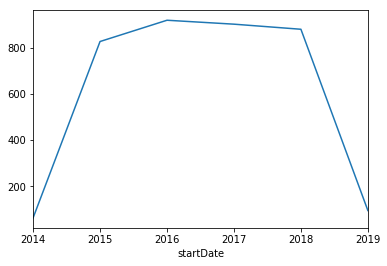

In [21]:
dfy.plot()

In [22]:
dfc = cordish2020matches.groupby(cordish2020matches['startDate'].map(lambda x: x.year)).sum()['totalCost']

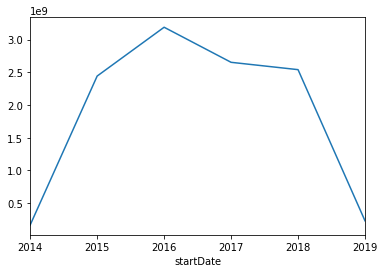

In [23]:
dfc.plot()

In [24]:
df_c = cordish2020matches.groupby(['coordinator','coordinatorCountry']).count()['id'].sort_values(ascending=False).reset_index()
df_c.columns = ['coordinator','coordinatorCountry','count']

In [25]:
df_c.head(20)

,coordinator,coordinatorCountry,count
0,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,FR,63
1,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,UK,36
2,FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANG...,DE,35
3,COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERG...,FR,33
4,DEUTSCHES ZENTRUM FUER LUFT - UND RAUMFAHRT EV,DE,29
5,TECHNISCHE UNIVERSITEIT DELFT,NL,28
6,IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MED...,UK,26
7,"THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UN...",UK,21
8,FUNDACION TECNALIA RESEARCH & INNOVATION,ES,20
9,THE UNIVERSITY OF NOTTINGHAM,UK,19


In [26]:
cordish2020matches.columns

Index(['rcn', 'id', 'acronym', 'status', 'programme', 'topics',
       'frameworkProgramme', 'title', 'startDate', 'endDate', 'projectUrl',
       'objective', 'totalCost', 'ecMaxContribution', 'call', 'fundingScheme',
       'coordinator', 'coordinatorCountry', 'participants',
       'participantCountries', 'subjects', 'matches_group',
       'count_matches_group', 'count_unique_matches_group',
       'matches_technology', 'count_matches_technology',
       'count_unique_matches_technology', 'matches_term', 'count_matches_term',
       'count_unique_matches_term', 'count_matches'],
      dtype='object')

In [27]:
def get_terms_matrix(vector_of_terms, all_terms):
    matrix = []
    for vector in vector_of_terms:
        ind_vector = [0] * len(all_terms)
        for v in vector:
            for idx, i in enumerate(all_terms):
                if v == i:
                    ind_vector[idx] = 1
        matrix.append(ind_vector)
    table = pd.DataFrame(matrix)
    return table

In [28]:
all_terms = [i for i in set([*list(categories['sector']), *list(categories['group']), *list(categories['technology']), *list(terms)])]

In [29]:
all_terms[:10]

['daylight harnessing',
 'low GHG food-delivery chain',
 'high-efficiency lighting',
 'low GHG data centers',
 'light pipe',
 'combined heat and power (CHP)',
 'CHP',
 'parabolic trough',
 'direct seeding',
 'CSP']

In [30]:
matches_term_table = get_terms_matrix(list(cordish2020matches['matches_term']), all_terms)
matches_technology_table = get_terms_matrix(list(cordish2020matches['matches_technology']), all_terms)
matches_group_table = get_terms_matrix(list(cordish2020matches['matches_group']), all_terms)
#matches_sector_table = get_terms_matrix(list(cordish2020matches['matches_sector']), all_terms)

In [31]:
#matches_table = matches_sector_table + matches_group_table + matches_technology_table + matches_term_table
matches_table = matches_group_table + matches_technology_table + matches_term_table

In [32]:
matches_table.columns = all_terms

In [33]:
matches_table['count'] = matches_table.sum(axis=1)

In [34]:
matches_table.head()

,daylight harnessing,low GHG food-delivery chain,high-efficiency lighting,low GHG data centers,light pipe,combined heat and power (CHP),CHP,parabolic trough,direct seeding,CSP,...,improved durability,district heating,direct casting,biopolymer,remote area power supply,Improved durability,sylviculture,efficient lighting,heat pumps,count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
len(matches_table)

3683

In [36]:
full_table_tech_matches = pd.concat([cordish2020matches.reset_index(), matches_table], axis=1).sort_values(['count_matches','count'], ascending=False).reset_index()

In [37]:
len(full_table_tech_matches)

3683

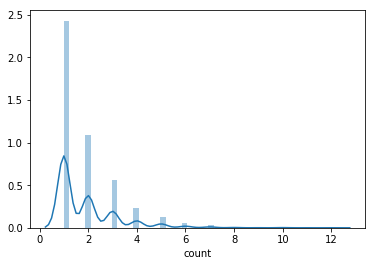

In [38]:
import seaborn as sns
sns.distplot(full_table_tech_matches['count'])

In [39]:
full_table_tech_matches[['id','acronym','title','objective','count','count_matches']].head(30)
full_table_tech_matches[['id','acronym','title','objective','count','count_matches']].to_csv('tech.csv')

In [40]:
termsT = full_table_tech_matches.iloc[:,33:-1].T
termsT['sum'] = termsT.sum(axis=1)

In [41]:
termsT.sort_values('sum', ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,3674,3675,3676,3677,3678,3679,3680,3681,3682,sum
Storage,0,1,0,0,1,1,1,1,0,1,...,0,0,0,1,0,0,1,0,0,784
Fuel,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,686
recycling,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,502
energy storage,0,0,0,0,0,2,2,2,0,0,...,0,0,0,0,0,0,0,0,0,386
renewable energy,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,380
aircraft,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,373
Wind,1,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,344
logistics,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,215
car,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,208
fuel cell,0,0,0,0,0,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,190


In [42]:
len(termsT[termsT['sum']>0])/len(termsT)

0.4888888888888889